## Предсказание цен машин.Automobile Data Set (https://archive.ics.uci.edu/ml/datasets/Automobile).

In [85]:
!pip install category_encoders

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format="retina"

In [91]:
columns = ["symboling",
 "normalized-losses",
 "make",
 "fuel-type",
 "aspiration",
 "num-of-doors",
 "body-style",
 "drive-wheels",
 "engine-location",
 "wheel-base",
 "length",
 "width",
 "height",
 "curb-weight",
 "engine-type",
 "num-of-cylinders",
 "engine-size",
 "fuel-system",
 "bore",
 "stroke",
 "compression-ratio",
 "horsepower",
 "peak-rpm",
 "city-mpg",
 "highway-mpg",
 "price"]

In [92]:
# Загрузка данных
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None, names=columns)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


## EDa

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [94]:
# Посчитаем сколько пропусков в наших данных
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [95]:
(df == "?").sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [96]:
for col in df.columns:
    if('?' in df[col].values):
        print(col + " = " + str(len(df[df[col]=='?'])))

normalized-losses = 41
num-of-doors = 2
bore = 4
stroke = 4
horsepower = 2
peak-rpm = 2
price = 4


/tmp/ipykernel_32/1578094946.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if('?' in df[col].values):


In [97]:
# Конвертируем тип данных и удаляем '?' из колонки price
df['price'] = df['price'].replace('?',np.nan)
df['price'] = pd.to_numeric(df['price'])
df = df[df['price'].notna()]

# Удаляем '?' из колонки num-of-doors 
df['num-of-doors'] = df['num-of-doors'].replace('?',np.nan)
df = df[df['num-of-doors'].notna()]

In [98]:
# Заменяем '?' средними значениями
num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm']
for col in num_col:
    df[col] = df[col].replace('?', np.nan)
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)

In [99]:
# признаки, в которых меньше 10 уникальных значений
df.nunique()[df.nunique() < 10].index

Index(['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [100]:
#Тип колонок. Например при помощи метода .select_dtypes(object)

df.select_dtypes(object)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
# Закодируем числами
#str_num_cols = ["num-of-doors", "num-of-cylinders"]
#df[str_num_cols] = df[str_num_cols].replace({'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8})

In [101]:
print("Список численных признаков: " , df.select_dtypes(include=np.number).columns.tolist())
print("Список категориальных признаков: " , df.select_dtypes(include=['object']).columns.tolist())

Список численных признаков:  ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
Список категориальных признаков:  ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


## Матрица корреляций для числовых признаков ..

<Axes: >

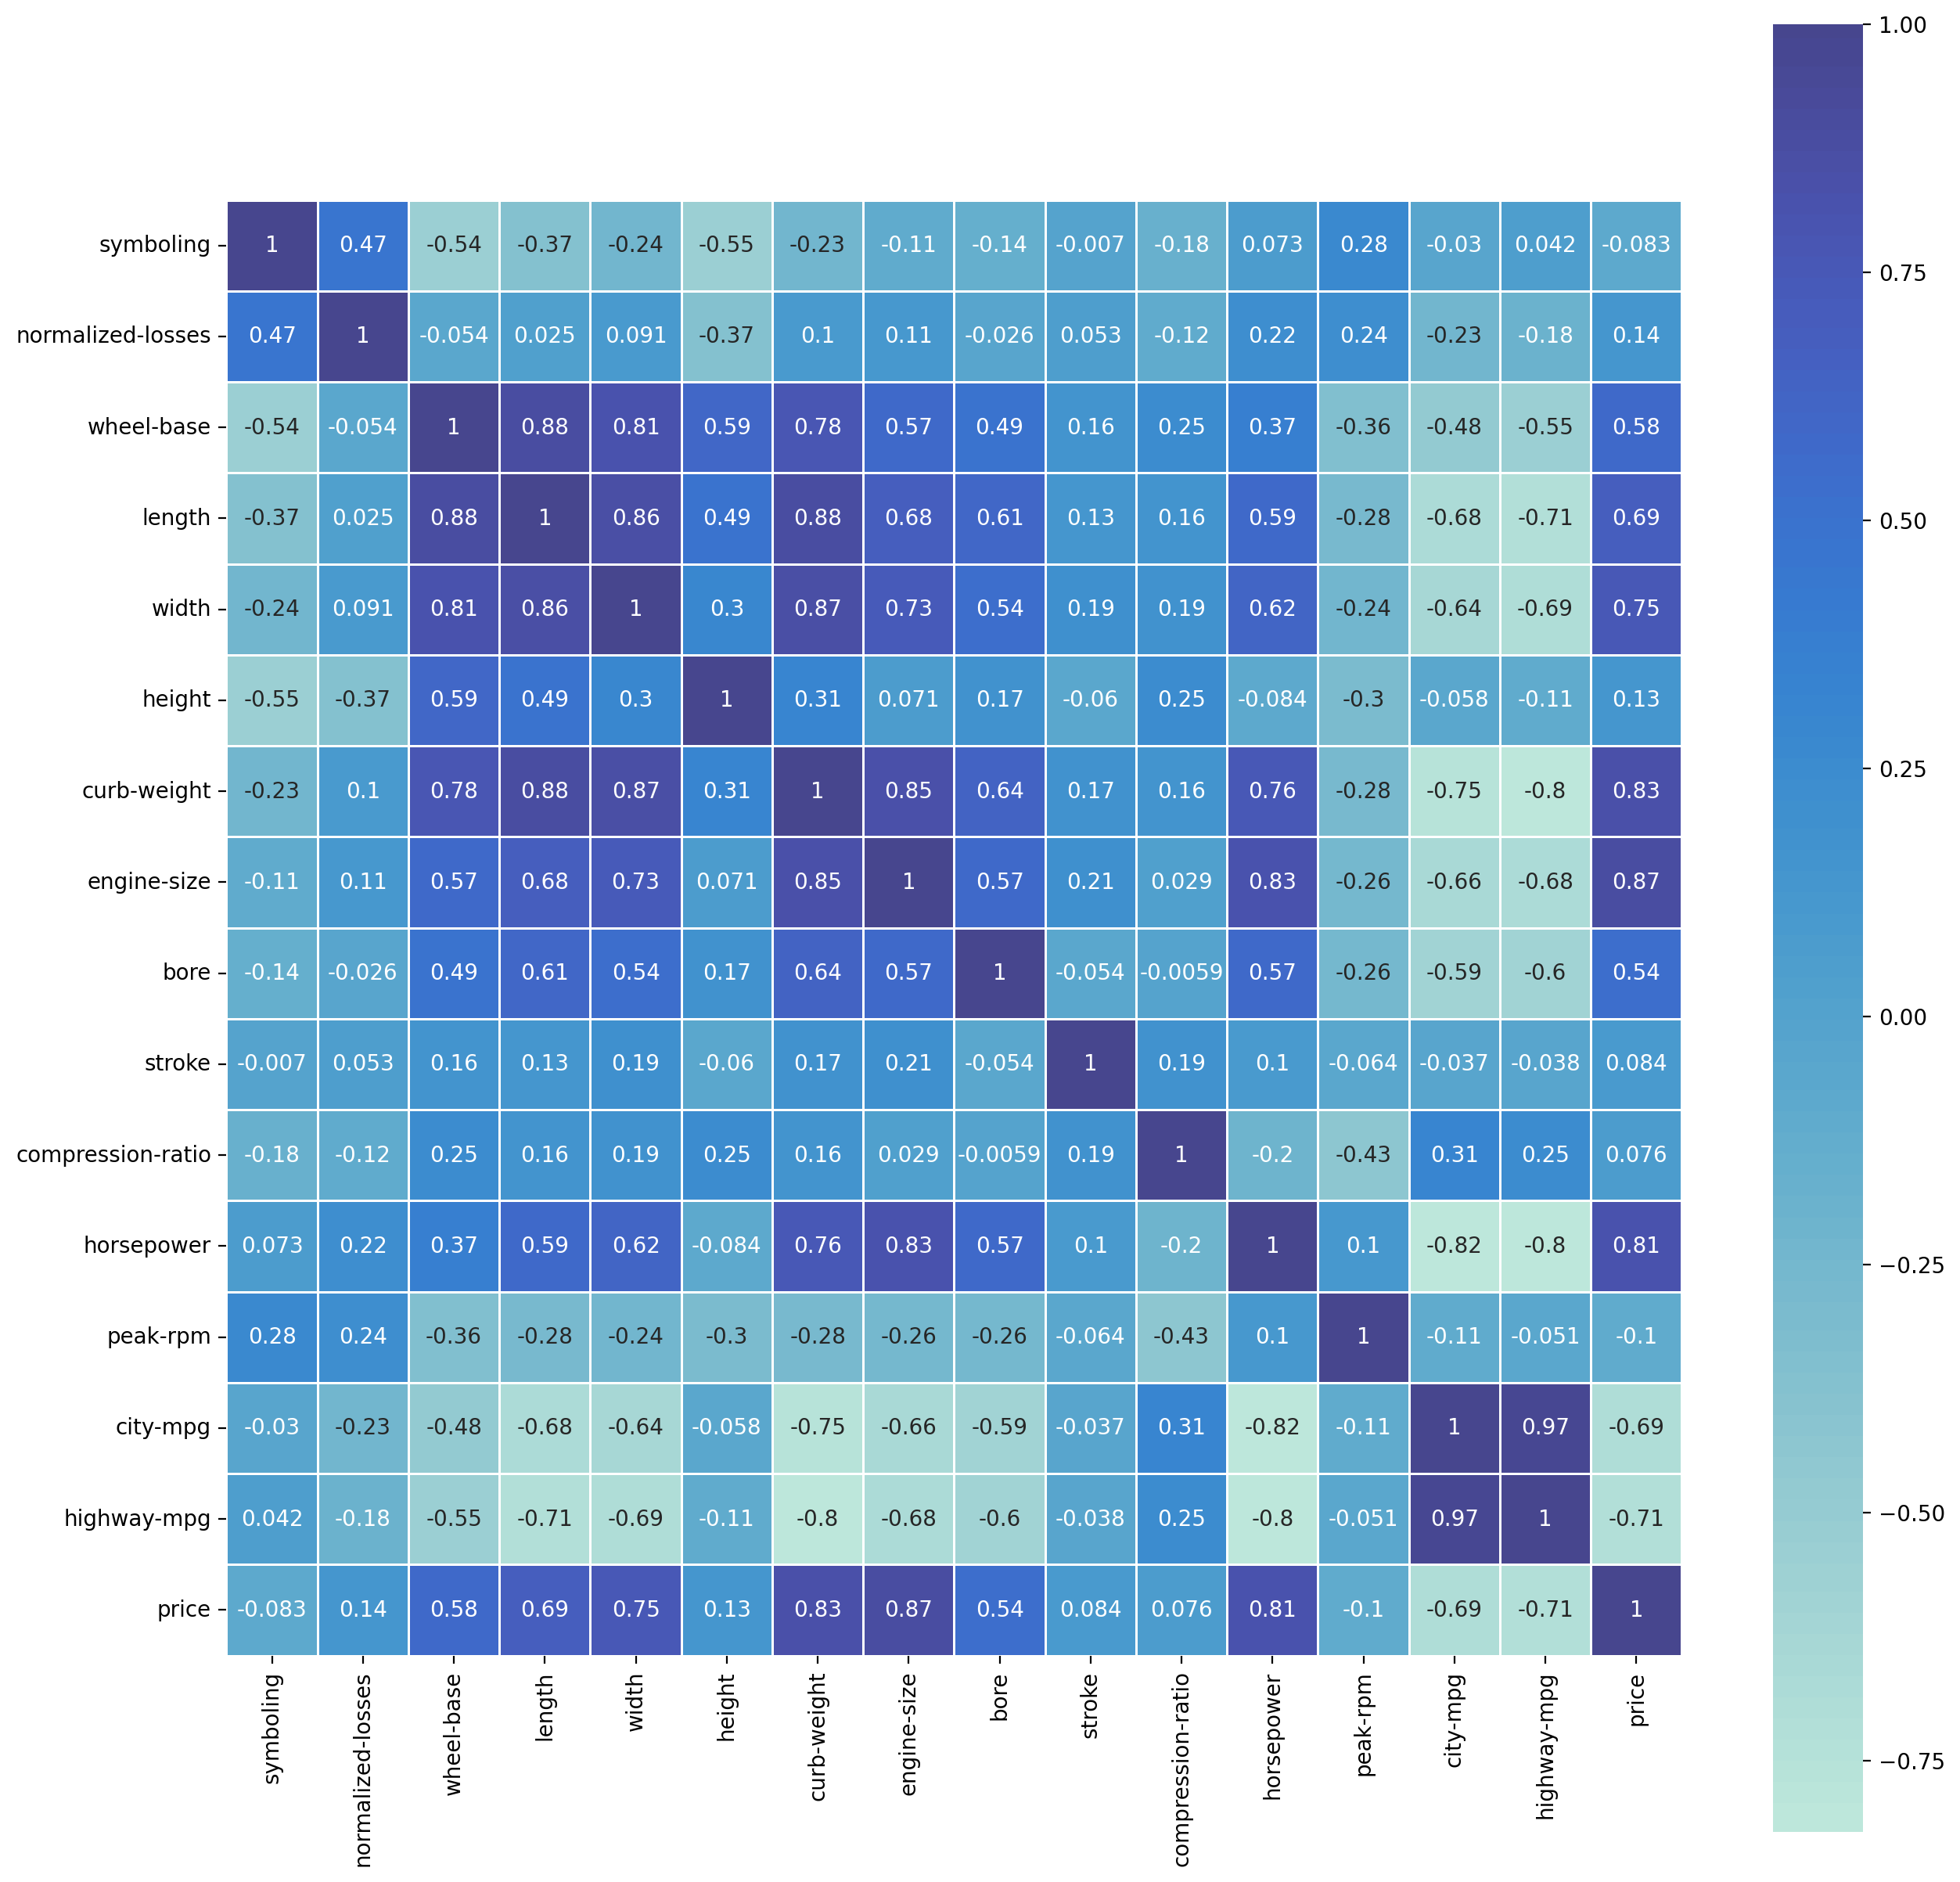

In [102]:
corr = df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
           'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].corr()
f,axes = plt.subplots(1,1,figsize = (15,15))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)

### Корреляция числовых признаков и таргета.

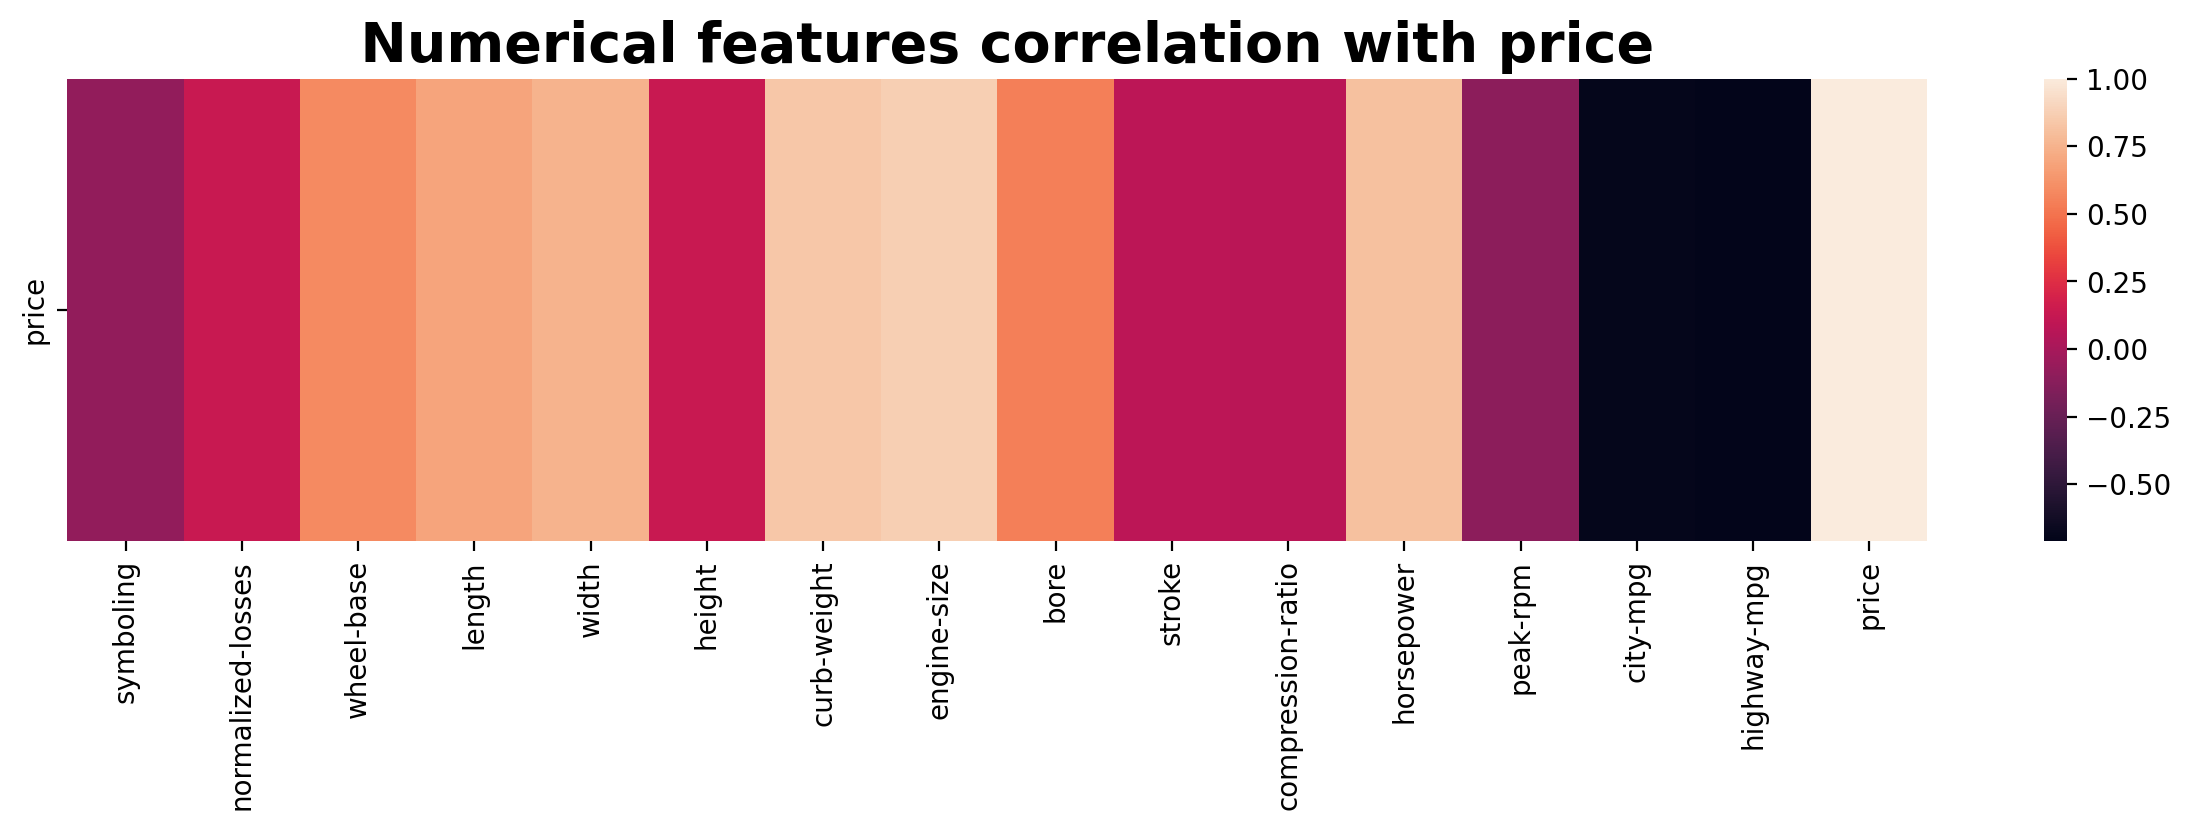

In [103]:
num = df.select_dtypes(include=np.number)
numcorr = num.corr()
f,ax = plt.subplots(figsize=(15,3))
sns.heatmap(numcorr.sort_values(by=['price'], ascending=False).head(1))
plt.title(" Numerical features correlation with price", weight='bold', fontsize=20)
plt.show()

### Сортировка убывания

In [104]:
Num = numcorr['price'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,price
price,1.000000
engine-size,0.872152
curb-weight,0.834059
horsepower,0.811081
width,0.751628
length,0.691207
wheel-base,0.583842
bore,0.542560
normalized-losses,0.135869
height,0.133639


### Размер двигателя, снаряженная масса, лошадиные силы имеют самые высокие значения корреляции с ценой.

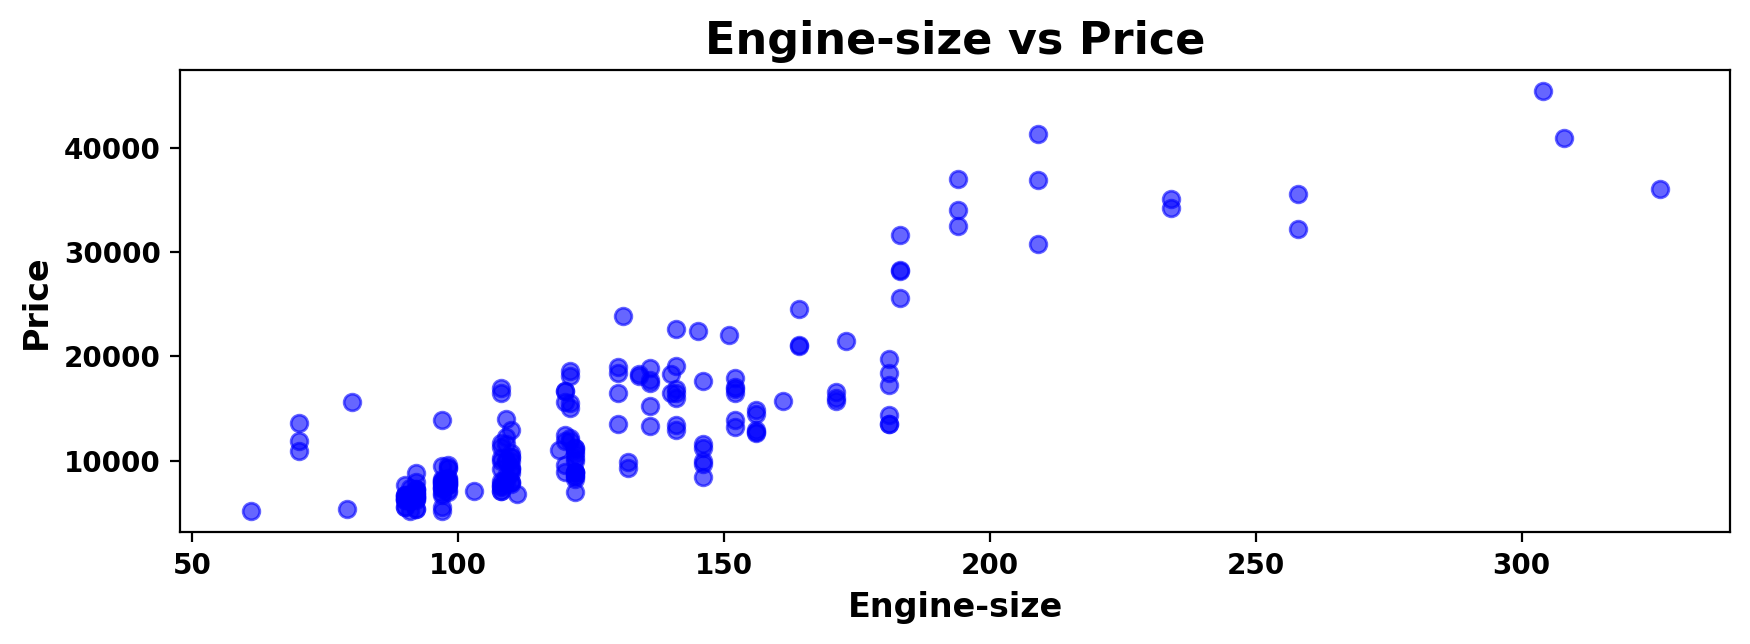

In [105]:
plt.figure(figsize=(10,3))
plt.scatter(x=df['engine-size'], y=df['price'], color='blue', alpha=0.6)
plt.title('Engine-size vs Price', weight='bold', fontsize=16)
plt.xlabel('Engine-size', weight='bold', fontsize=12)
plt.ylabel('Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

### Посмотрим на распределение некторых

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


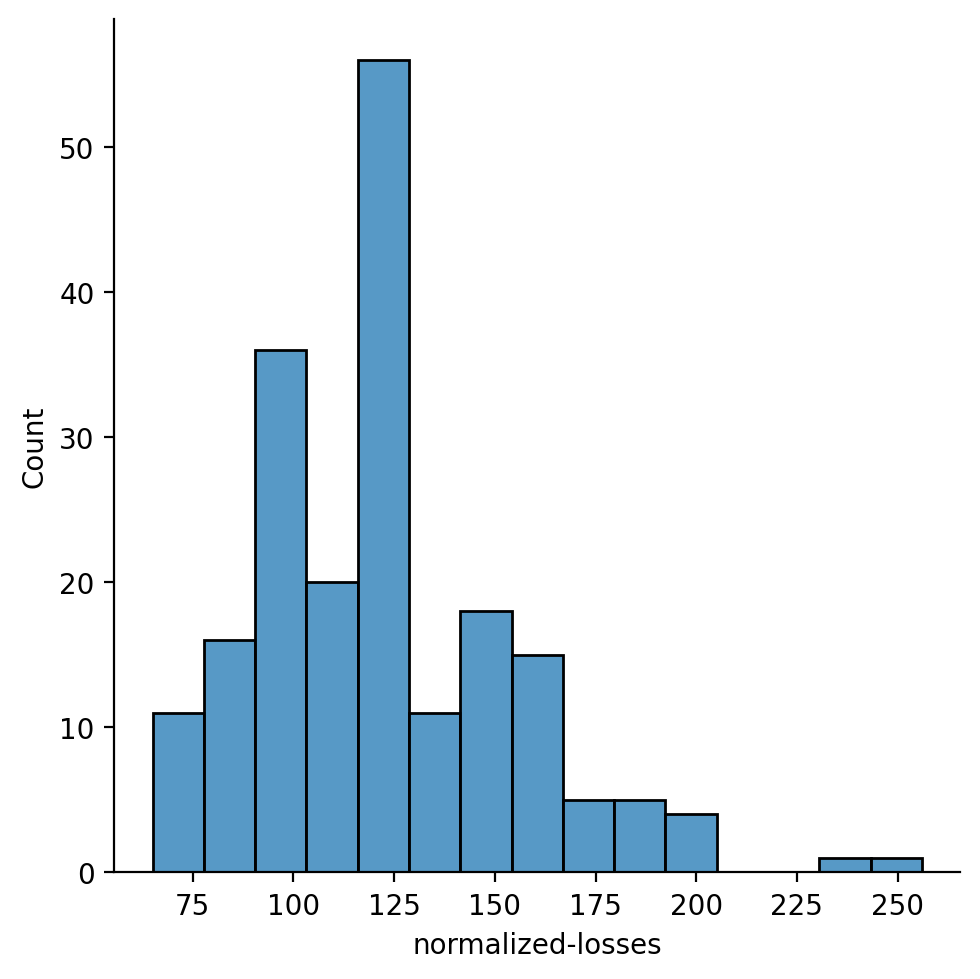

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


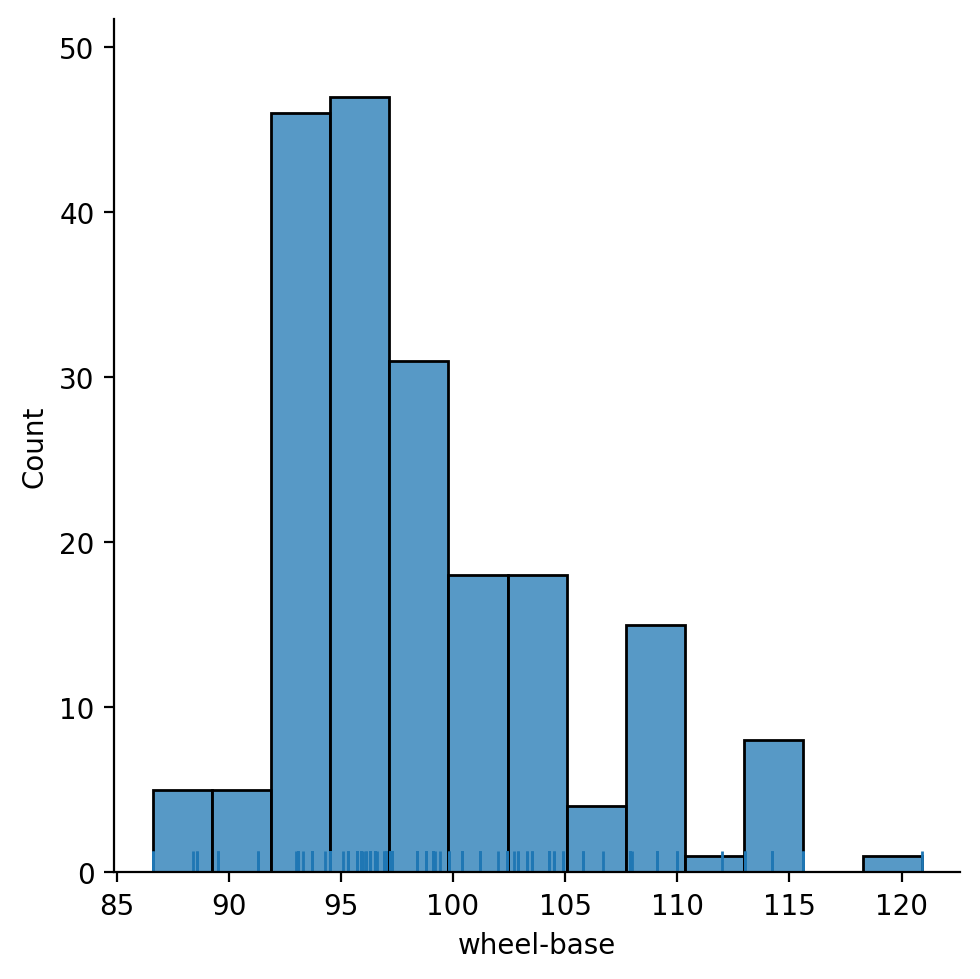

In [106]:
sns.displot(df['normalized-losses'])
plt.show()
sns.displot(df['wheel-base'], rug=True)
plt.show()

### Построим парное распределение некоторых признаков.

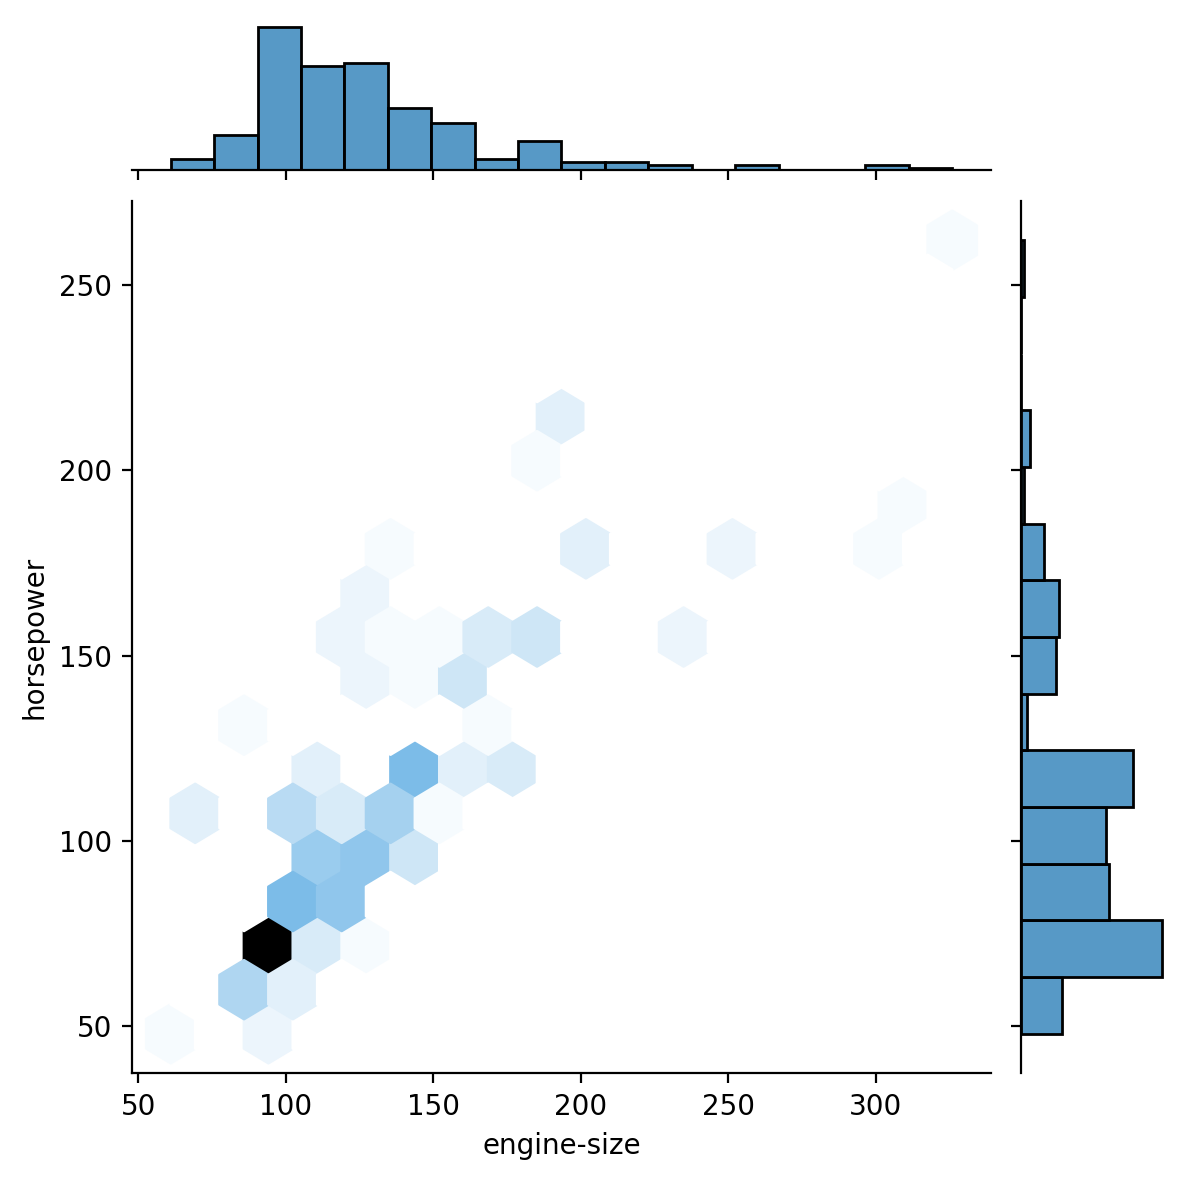

In [107]:
sns.jointplot(data = df, x=df['engine-size'], y=df['horsepower'], kind="hex")
plt.show()

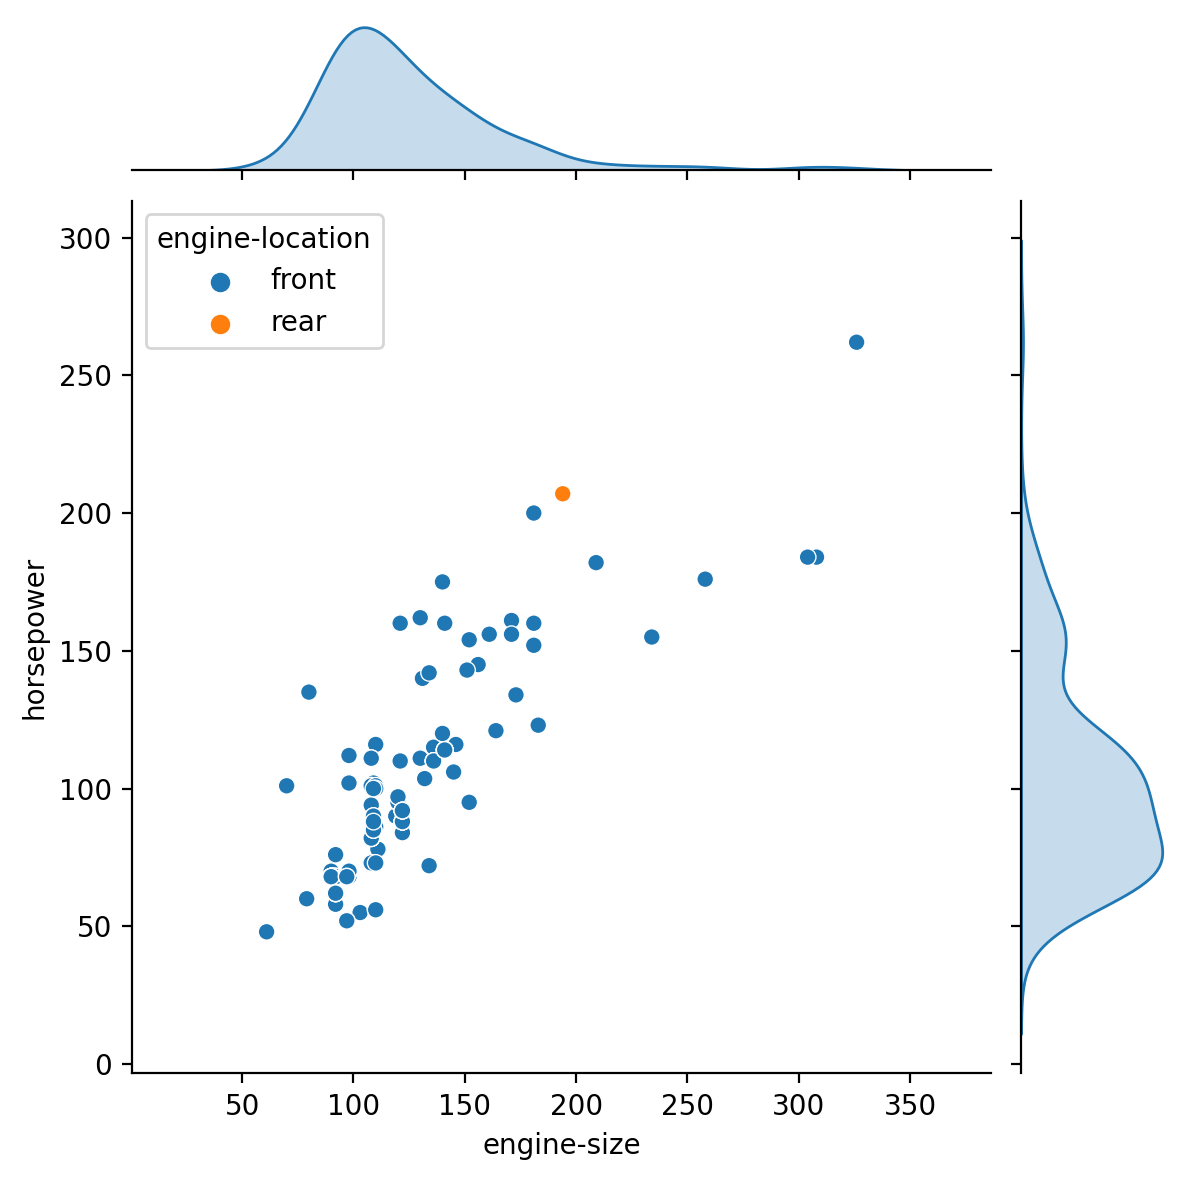

In [108]:
sns.jointplot(data = df, x=df['engine-size'], y=df['horsepower'], hue="engine-location")
plt.show()

## Категориальные признаки.

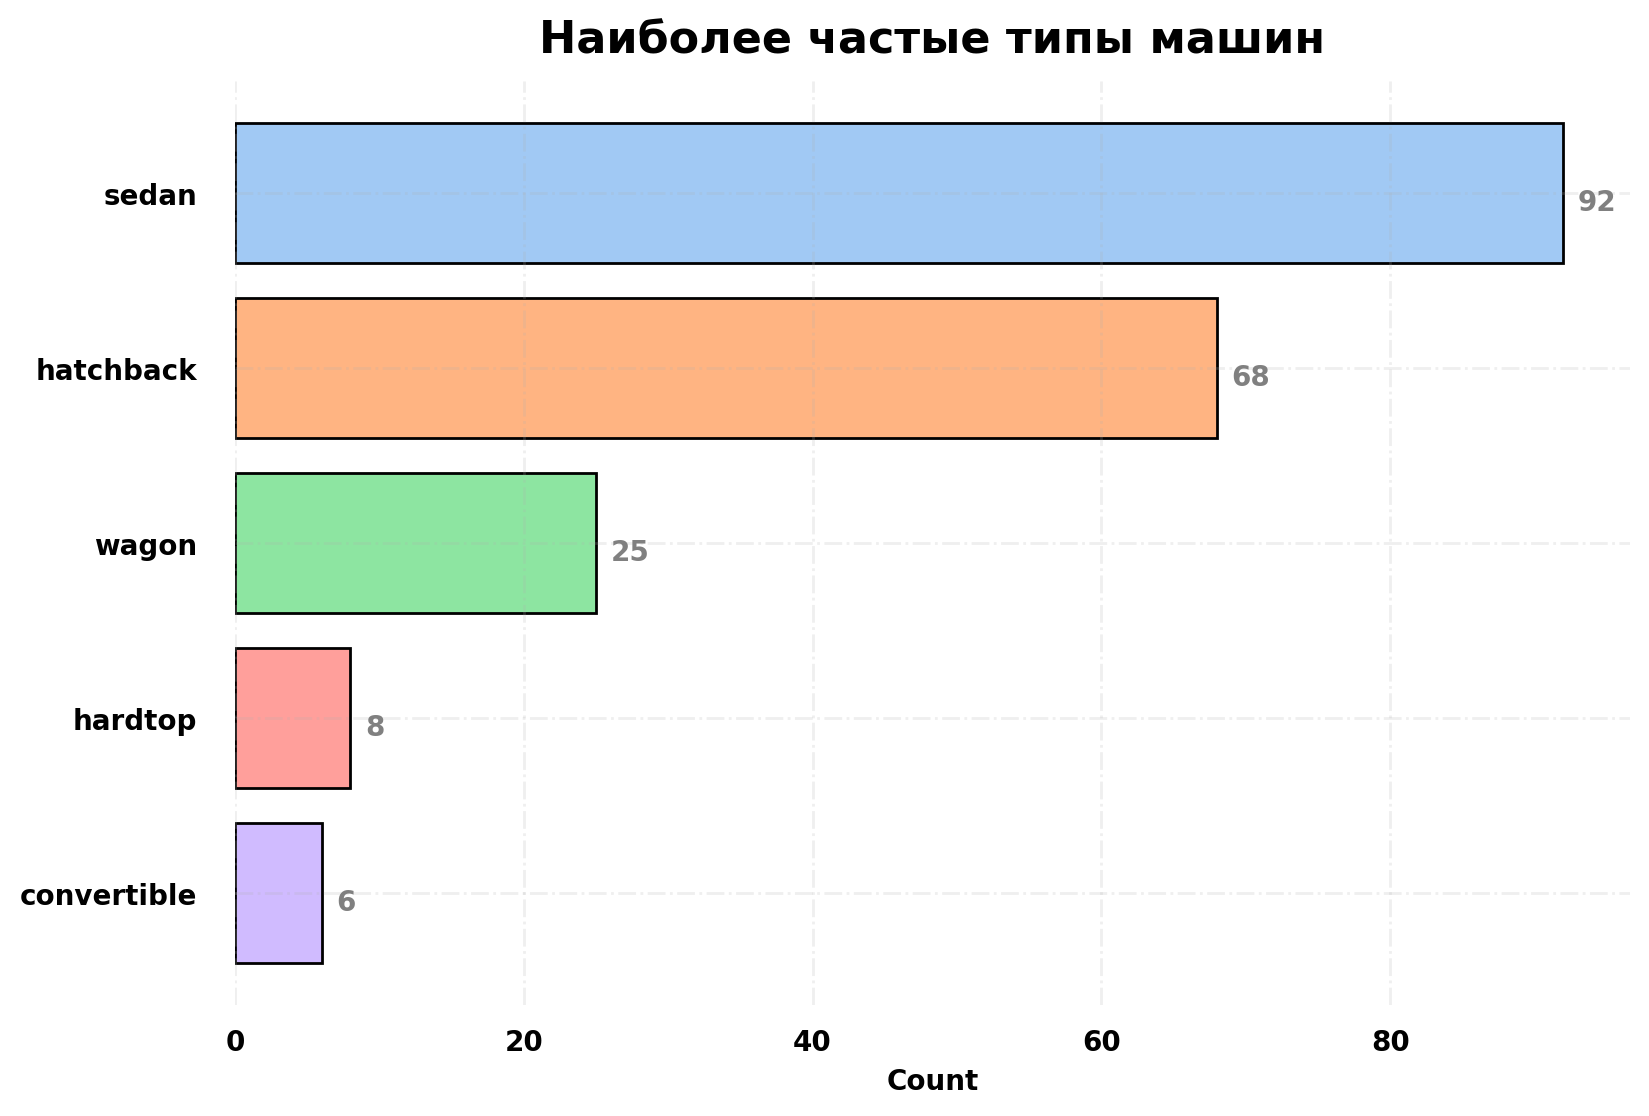

In [109]:
df.rename(columns={'body-style': 'bodystyle'}, inplace=True)
# Ставим размер 
fig, ax = plt.subplots(figsize=(9,6))
# Рисуем гистограмму
title_cnt=df.bodystyle.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))
# Удаляем границы осей
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
# Удаляем деления x,y
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Добавляем отступы между осями и подписями
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
# Добавляем оси
ax.grid(visible=True, linestyle='-.', linewidth=1, alpha=0.2)
# Отобразим по убыванию 
ax.invert_yaxis()
# Добавляем подписи
ax.set_title('Наиболее частые типы машин',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')
# Добавляем аннотацию
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Рисуем
plt.show()

## Построим теперь boxplot-ы для численных признаков.

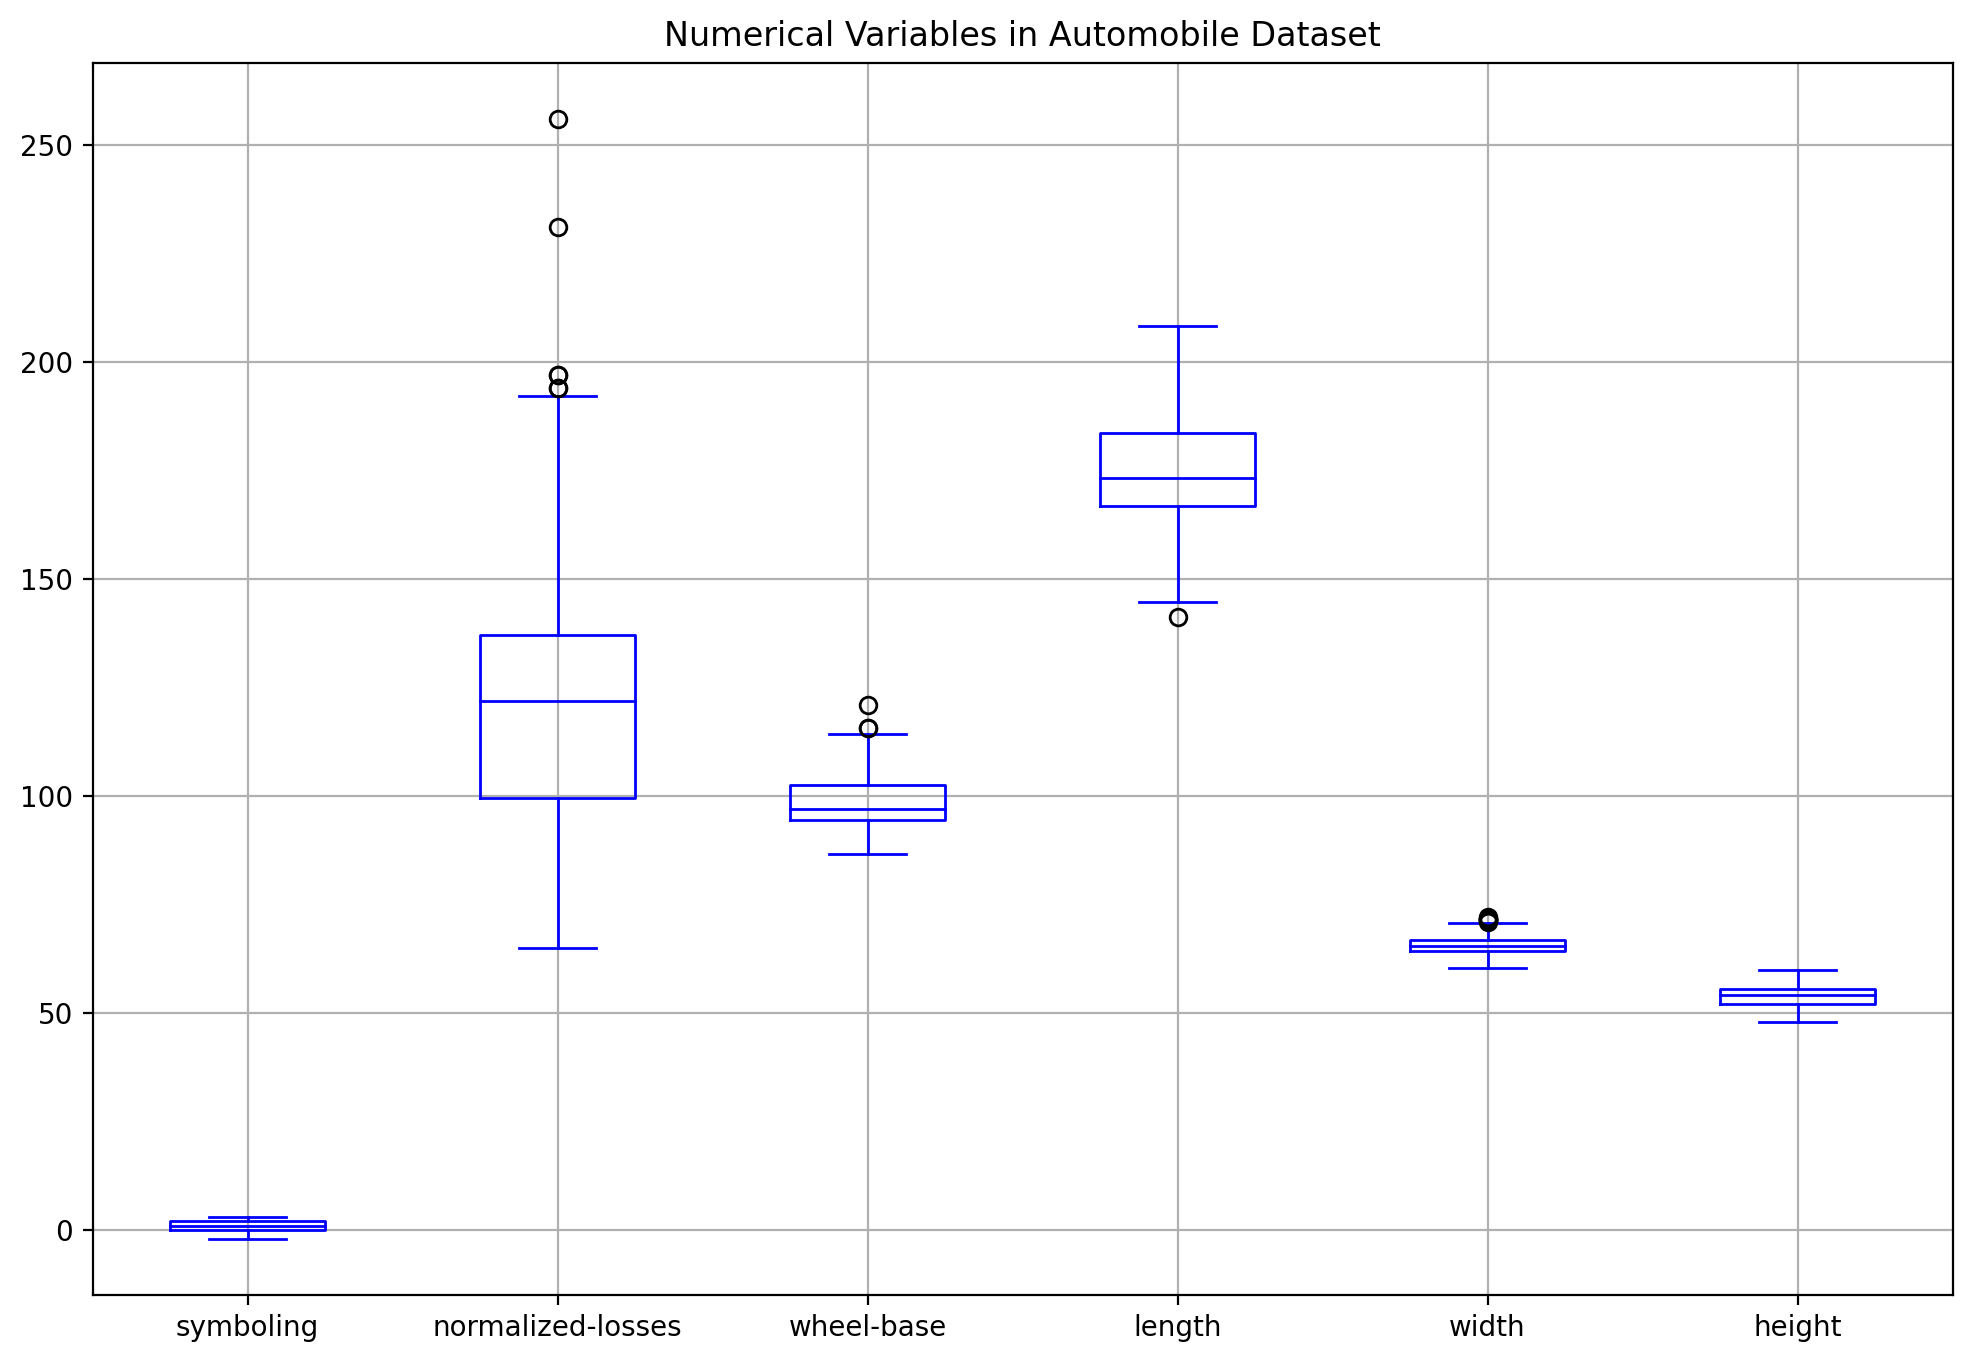

In [110]:
numeric_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height'] 
plt.figure(figsize=(12,8))
plt.title("Numerical Variables in Automobile Dataset")
df[numeric_cols].boxplot(color='blue')
plt.show()

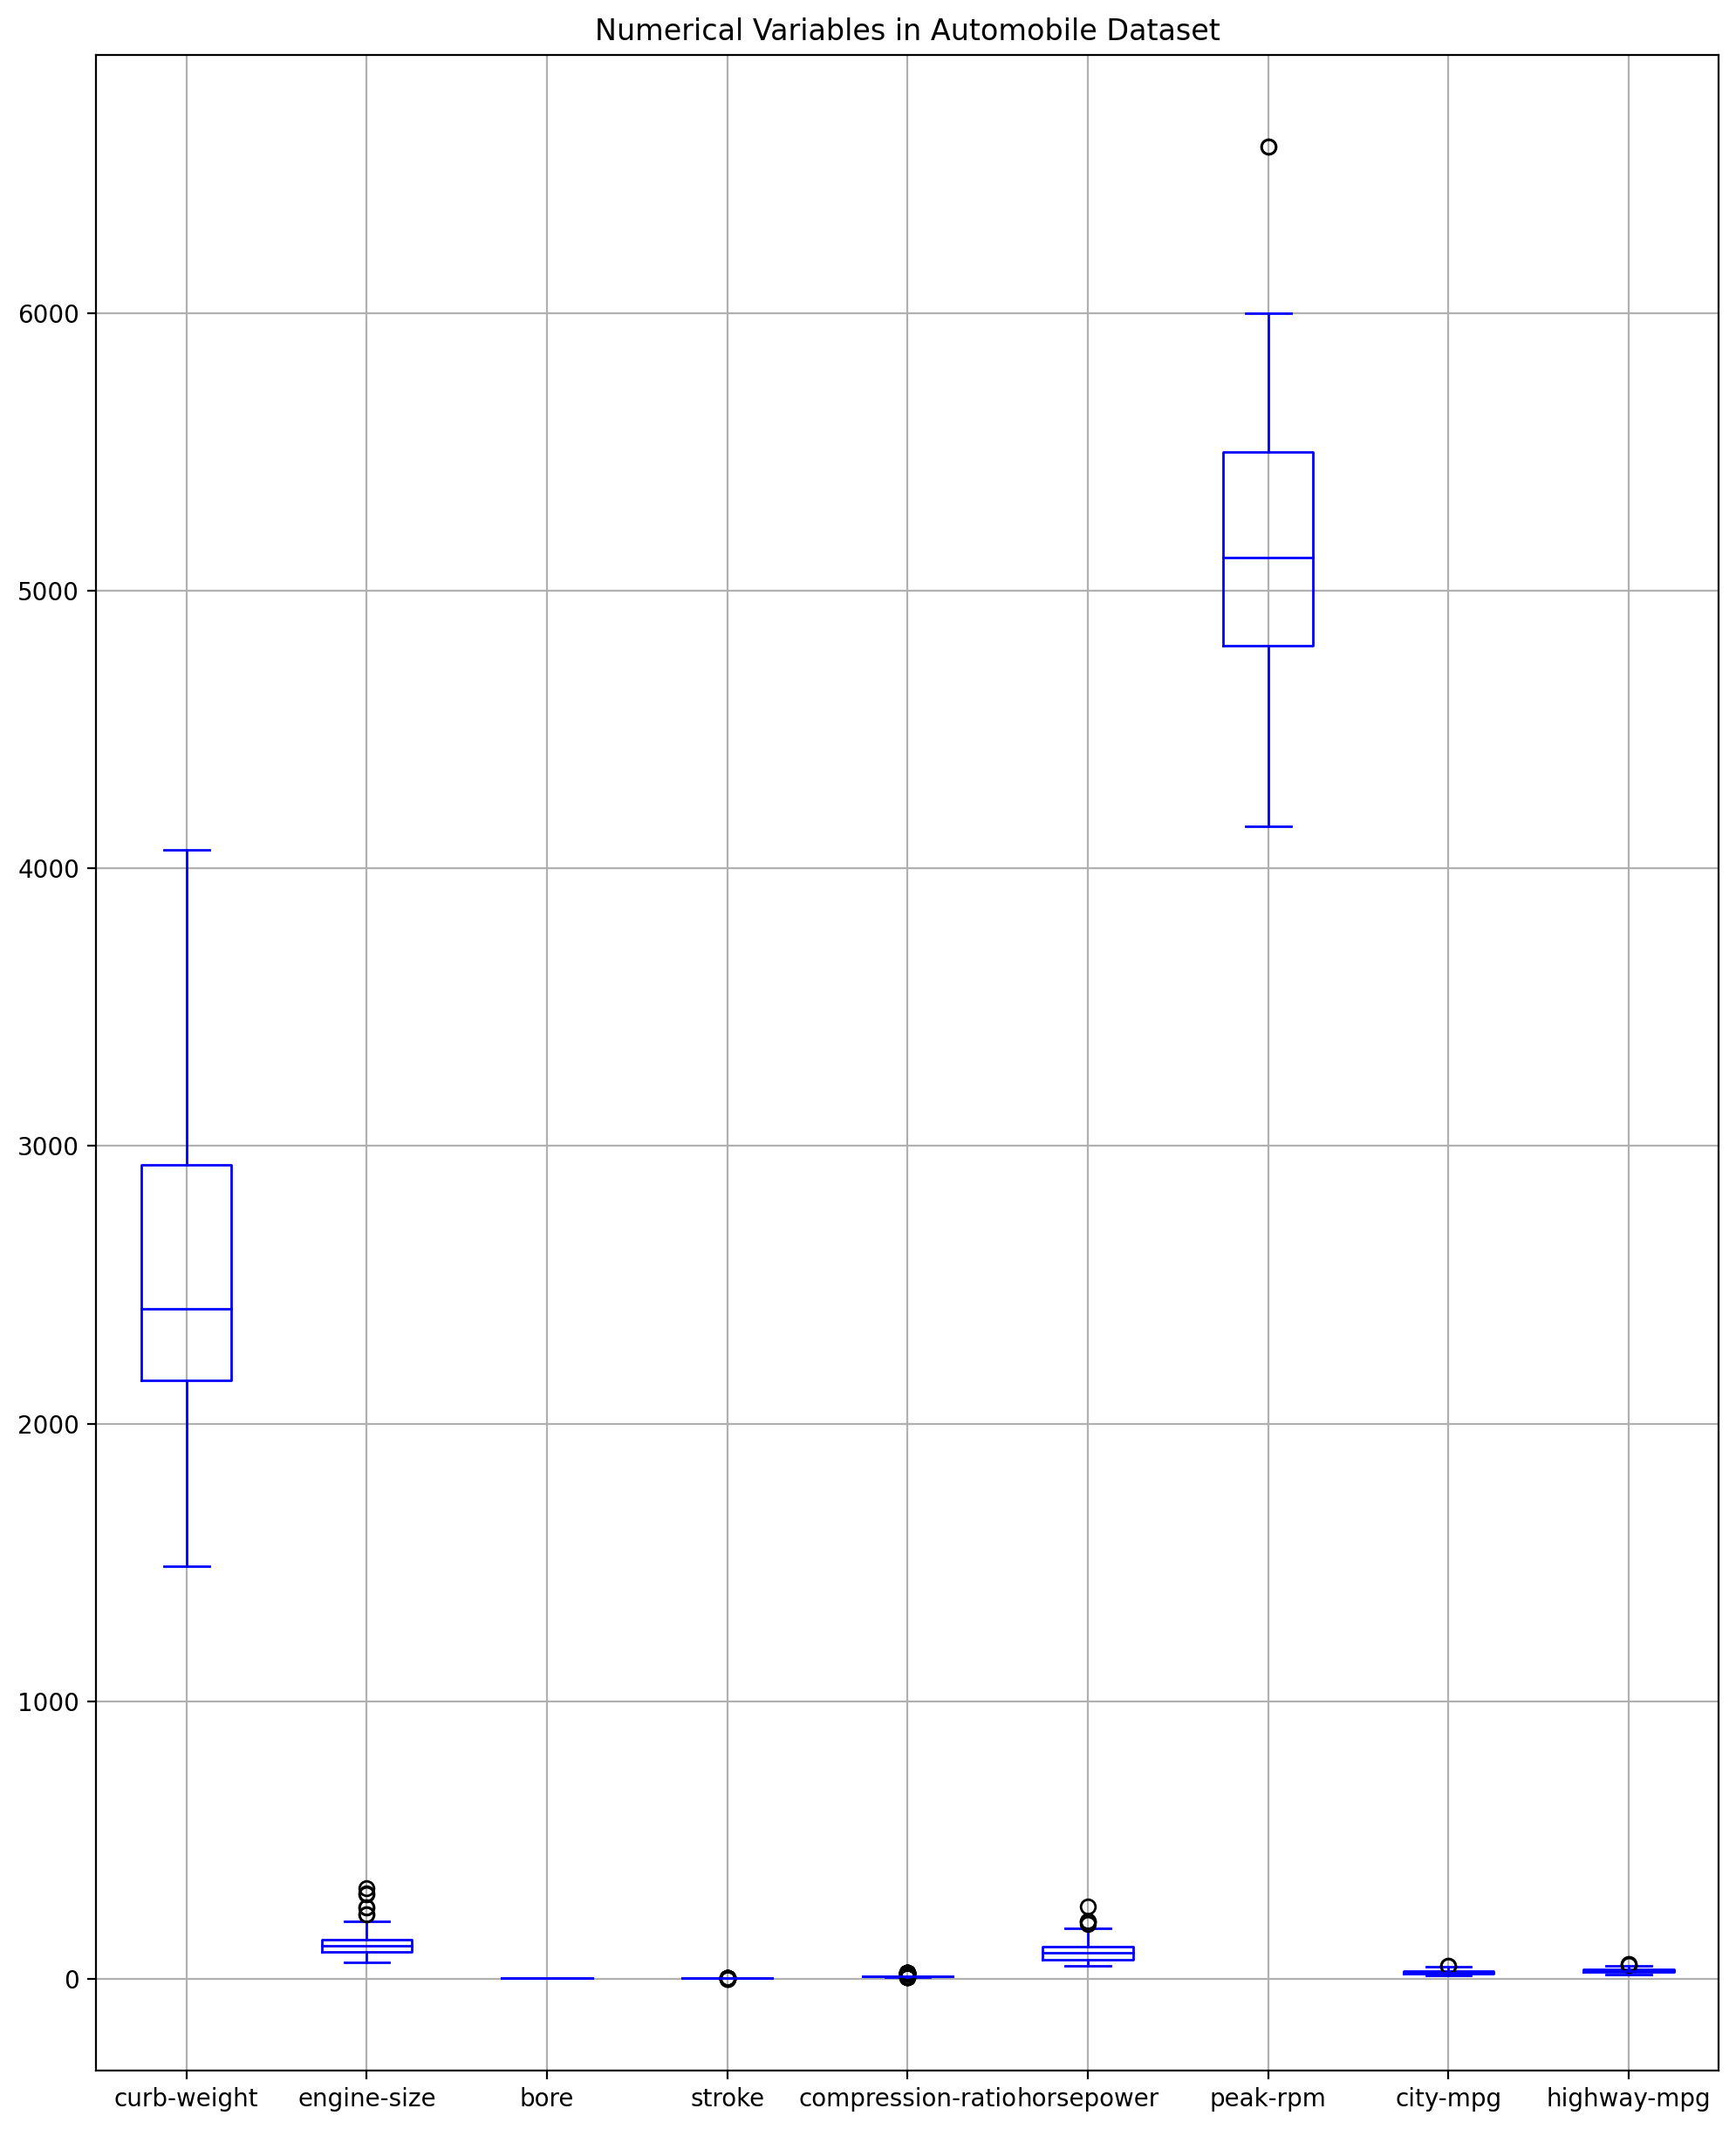

In [111]:
numeric_cols = ['curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
plt.figure(figsize=(12,15))
plt.title("Numerical Variables in Automobile Dataset")
df[numeric_cols].boxplot(color='blue')
plt.show()

## Устраним выбросы

In [112]:
df.rename(columns={'normalized-losses': 'normalizedlosses', 'peak-rpm': 'peakrpm'}, inplace=True)
df.columns

Index(['symboling', 'normalizedlosses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'bodystyle', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [113]:
df['normalizedlosses'].unique()

array([121.8404908, 164.       , 158.       , 192.       , 188.       ,
       121.       ,  98.       ,  81.       , 118.       , 148.       ,
       110.       , 145.       , 137.       , 101.       ,  78.       ,
       106.       ,  85.       , 107.       , 104.       , 113.       ,
       150.       , 129.       , 115.       ,  93.       , 142.       ,
       161.       , 153.       , 125.       , 128.       , 122.       ,
       103.       , 168.       , 108.       , 194.       , 231.       ,
       119.       , 154.       ,  74.       , 186.       ,  83.       ,
       102.       ,  89.       ,  87.       ,  77.       ,  91.       ,
       134.       ,  65.       , 197.       ,  90.       ,  94.       ,
       256.       ,  95.       ])

In [114]:
df['normalizedlosses'] = df['normalizedlosses'].replace(256.0, np.nan)
df['normalizedlosses'].fillna(df['normalizedlosses'].mean(), inplace=True)
df['normalizedlosses'] = df['normalizedlosses'].replace(231.0, np.nan)
df['normalizedlosses'].fillna(df['normalizedlosses'].mean(), inplace=True)

In [115]:
df['peakrpm'].unique()

array([5000.        , 5500.        , 5800.        , 4250.        ,
       5400.        , 5100.        , 4800.        , 6000.        ,
       4750.        , 4200.        , 4350.        , 4500.        ,
       5200.        , 4150.        , 5600.        , 5900.        ,
       5118.02030457, 5250.        , 4900.        , 4400.        ,
       6600.        , 5300.        ])

In [116]:
df[df.peakrpm == 6600]

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,bodystyle,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
165,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0


In [117]:
i = df[((df.peakrpm == 6600.0))].index
df = df.drop(i)

In [118]:
print(df["num-of-doors"].value_counts())
print(df["num-of-cylinders"].value_counts())

num-of-doors
four    113
two      84
Name: count, dtype: int64
num-of-cylinders
four      153
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: count, dtype: int64


## Категориальные признаки

In [119]:
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
df = df.replace(cleanup_nums)
df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,bodystyle,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
0,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.840491,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [120]:
df.rename(columns={'body-style': 'bodystyle', 'drive-wheels': 'drivewheels'}, inplace=True)
print(df['bodystyle'].unique())
print(df['drivewheels'].unique())


['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']


In [121]:
df = pd.get_dummies(df, columns=["bodystyle", "drivewheels"], prefix=["body", "drive"])
df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,...,highway-mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,13495.0,True,False,False,False,False,False,False,True
1,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,16500.0,True,False,False,False,False,False,False,True
2,1,121.840491,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,26,16500.0,False,False,True,False,False,False,False,True
3,2,164.000000,audi,gas,std,4,front,99.8,176.6,66.2,...,30,13950.0,False,False,False,True,False,False,True,False
4,2,164.000000,audi,gas,std,4,front,99.4,176.6,66.4,...,22,17450.0,False,False,False,True,False,True,False,False


In [122]:
df["engine-type"].value_counts()

engine-type
ohc      143
ohcf      15
ohcv      13
l         12
dohc      10
rotor      4
Name: count, dtype: int64

In [123]:
df["OHC_Code"] = np.where(df["engine-type"].str.contains("ohc"), 1, 0)
df[["make", "engine-type", "OHC_Code"]].head()

,make,engine-type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


### Закодируем марку

In [124]:
from category_encoders import CountEncoder

count_enc = CountEncoder()
df["make_code"] = count_enc.fit_transform(df[["make"]])
df[["make", "make_code"]].head(10)

,make,make_code
0,alfa-romero,3
1,alfa-romero,3
2,alfa-romero,3
3,audi,6
4,audi,6
5,audi,6
6,audi,6
7,audi,6
8,audi,6
10,bmw,8


## Финальная таблица

In [125]:
df_final = df[['symboling', 'normalizedlosses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
           'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg', 'price', 'num-of-doors', 'num-of-cylinders', 'body_convertible', 
           'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'OHC_Code', 'make_code']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 204
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   normalizedlosses   197 non-null    float64
 2   wheel-base         197 non-null    float64
 3   length             197 non-null    float64
 4   width              197 non-null    float64
 5   height             197 non-null    float64
 6   curb-weight        197 non-null    int64  
 7   engine-size        197 non-null    int64  
 8   bore               197 non-null    float64
 9   stroke             197 non-null    float64
 10  compression-ratio  197 non-null    float64
 11  horsepower         197 non-null    float64
 12  peakrpm            197 non-null    float64
 13  city-mpg           197 non-null    int64  
 14  highway-mpg        197 non-null    int64  
 15  price              197 non-null    float64
 16  num-of-doors       197 non-null

## Модель

In [126]:
from sklearn.model_selection import train_test_split
# Признаки и таргет
X = df_final.drop(columns=["price"])
y = df_final["price"]

# Разделим на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Нормируем,стандартизируем признаки
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## KNN

In [127]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors = 5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

### Линейная регрессия

In [128]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

## Метрики

$\widetilde{y}$ -- предсказанное значение, $y$ -- реальное значение:

* Mean Square Error (MSE): $\frac{1}{n}\sum\limits_i^n(\widetilde{y}_i - y_i)^2$
* Mean Absolute Error (MAE): $\frac{1}{n}\sum\limits_i^n|\widetilde{y}_i - y_i|$
* Max Error: $\max\limits_i |\widetilde{y}_i - y_i|$

* Coefficient of determination ($R^2$): $1 - \frac{\sigma_{\widetilde{y}}^2}{\sigma_y^2} \in (-∞, 1)$
* Mean Absolute Percentage Error (MAPE): $100 \cdot \frac{1}{n}\sum\limits_i^n\left|\frac{y_i - \widetilde{y}_i}{y_i}\right| \in [0, +∞)$



In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [130]:
# Cравним метрики KNN и Линейной регрессии

y_pred_knn = model_knn.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

print("MSE (KNN | LR): ", mean_squared_error(y_test, y_pred_knn), " | ", mean_squared_error(y_test, y_pred_lr))
print("MAE (KNN | LR): ", mean_absolute_error(y_test, y_pred_knn), " | ", mean_absolute_error(y_test, y_pred_lr))
print("MAX_ERROR (KNN | LR): ", max_error(y_test, y_pred_knn), " | ", max_error(y_test, y_pred_lr))

print("R2 (KNN | LR): ", r2_score(y_test, y_pred_knn), " | ", r2_score(y_test, y_pred_lr))
print("MAPE (KNN | LR): ", mean_absolute_percentage_error(y_test, y_pred_knn), " | ", mean_absolute_percentage_error(y_test, y_pred_lr))

MSE (KNN | LR):  35568219.609333344  |  17338127.748351377
MAE (KNN | LR):  3244.913333333333  |  2856.4622373441493
MAX_ERROR (KNN | LR):  21348.4  |  14799.108824129726
R2 (KNN | LR):  0.769222349274777  |  0.8875048446707078
MAPE (KNN | LR):  0.15207903581383633  |  0.1843414970690488


<Axes: xlabel='price'>

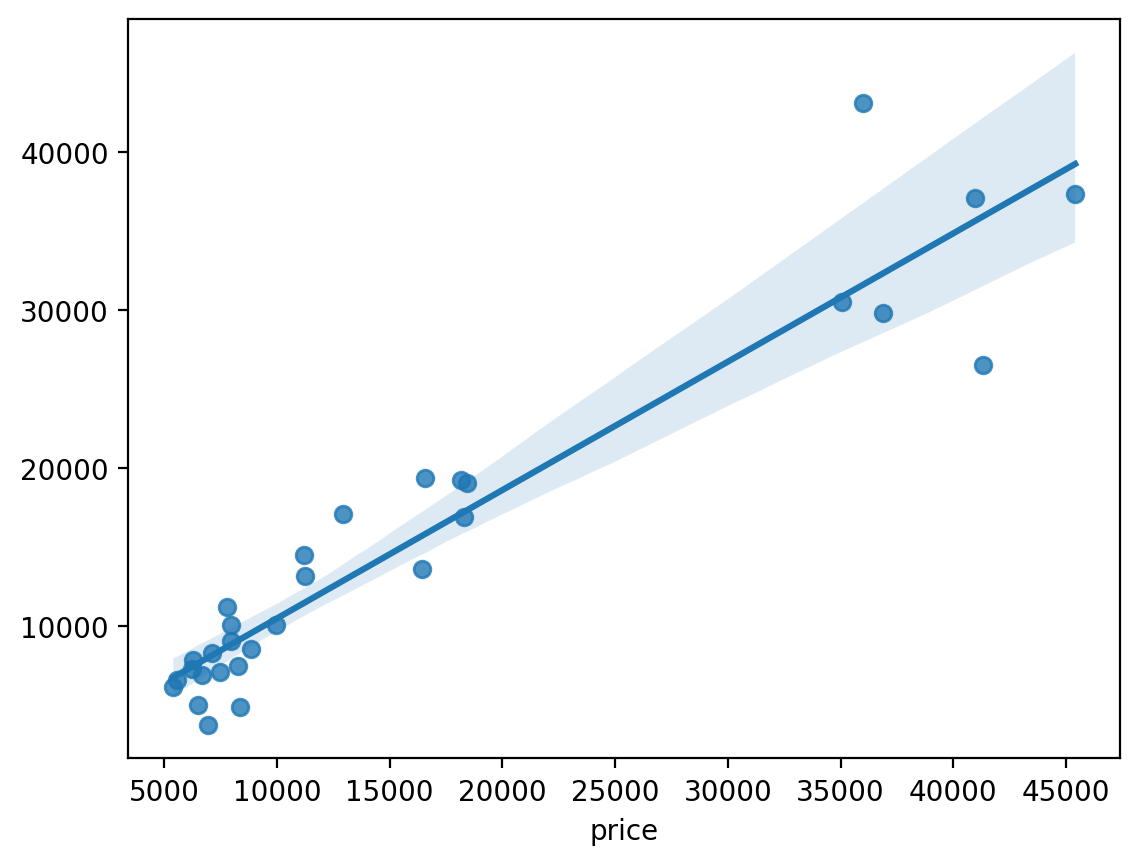

In [132]:
sns.regplot(x = y_test, y = y_pred_lr)

## Выводим коэффициенты регрессии.

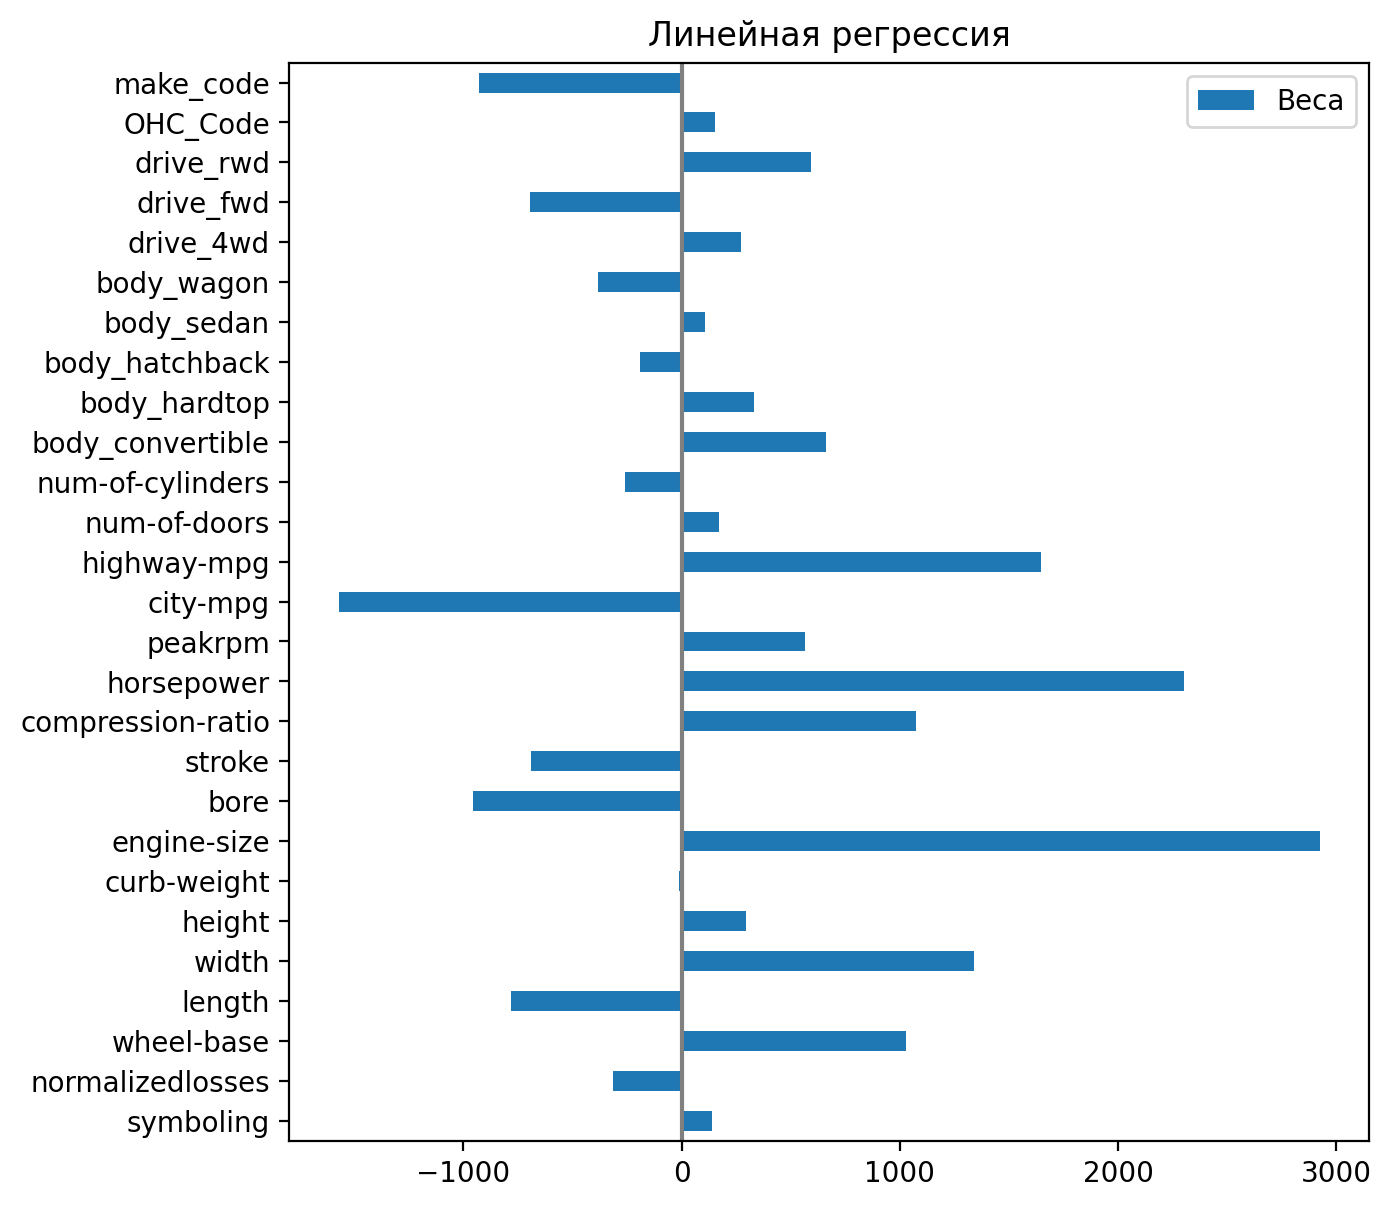

In [134]:
coefs = pd.DataFrame(
   model_lr.coef_,
   columns=['Веса'], index=df_final.drop('price',axis = 1).columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Линейная регрессия')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### Вывод: Исходя из совокупности метрик, можно заключить, что на наших данных модель линейной регрессии (LR) показывает более высокую точность и лучшую пригодность, чем модель KNN.